# Assignment 0 - House Prices

In this assignment we'll practice working with `pandas` `DataFrames` and train a linear regression model to predict house prices.

Fill in the cells provided marked `TODO` with code to answer the questions. Answers should do the computation stated rather than writing in hard-coded values. So for example, if a problem asks you to compute the average age of people in a dataset, you should be writing Python code in this notebook to do the computation instead of plugging it into some calculator and saving the hard-coded answer in the variable. **We will be grading your code on a slightly different dataset, so any hard-coded answers will be marked as incorrect!**

It is generally a good idea to restart the kernel and run all cells (especially before turning it in) to make sure your code runs correctly from start to finish.

NOTE: DO NOT delete any code that looks like the following: `### edTest(...) ###`. If you do, the corresponding test will not run, resulting in 0 points on that part of the assignment.

## Submitting

To submit your code and get your grade, press the "Mark" button on the bottom right of the screen. You can submit as many times as you want.

Unlike HW0, our test cases do not tell you what the expected answer is. You have to do your own debugging to determine what is wrong, but the test cases will tell you which part of the assignment is incorrect. **The score the autograder gives you will be your final score for the programming part of the homework.**

In [4]:
# Conventionally people rename the pandas import to pd for brevity
import pandas as pd
import numpy as np

**NOTE**: Be sure to run every cell in the notebook! The `###SKIP` is for the autograder. 

In [5]:
### SKIP

# Set seed to create pseudo-randomness
np.random.seed(416)

# Load in the data and preview it
sales = pd.read_csv('home_data.csv') 
sales.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


Do not modify the below cell. It configures the autograder, which will award 0 points if it doesn't run.

In [6]:
### edTest(test_load_data) ###

---
# Exploring the data.
This question asks you to explore the dataset we will be using. Answer the following three questions by writing code to compute the dsecribed values in the given variables names. Note that Q1 has 3 sub-questions.

## Q1) Exploring the data

a) How many houses do we have in our data set? This should correspond to the number of rows in the dataset. Save the number of rows in a variable called `num_rows`.

*Hint:* You can use `len()` to get the length of anything in Python. Note that when you use it on a DataFrame, it will give you the number of rows, not columns.

In [7]:
### edTest(test_num_rows) ###

# TODO
num_rows = len(sales)

b) Which column are we trying to predict given the other features (i.e. what's our output `y`)? Save the values from that column in a variable called `y`.

In [8]:
### edTest(test_get_labels) ###

# TODO 
y = sales.price

c) How many dimensions are in our input space (i.e., how many columns are there other than the output column)? Save the number of dimensions in the input space in a variable called `input_dimensions`.

In [9]:
### edTest(test_input_dimensions) ###

# TODO
input_dimensions = len(sales.columns) - 1

---
## Q2) What is the average (mean) price of houses with 3 bedrooms?

Compute the average (mean) price of houses in the dataset with 3 bedrooms. Save the result in `avg_price_3_bed`.

In [10]:
### edTest(test_avg_price_3_bed) ###

# TODO
avg_price_3_bed = sales[sales['bedrooms'] == 3]['price'].mean()

---
## Q3) What fraction of the properties are have `sqft_living` between 2000-4000?

Compute the fraction of properties with `sqft_living` between 2000 (inclusive) and 4000 (exclusive). Your answer should be stored in `percent_q3` and it should be a number between 0 and 1.
 

In [11]:
### edTest(test_percent_q3) ###

# TODO
percent_q3 = len(sales[(sales['sqft_living'] >= 2000) & 
            (sales['sqft_living'] < 4000)]) / num_rows

---
# Training Linear Regression Models

## Q4) Training a Linear Regression Model.

We will now train a linear regression model to make useful predictions. Work through the steps below and then answer the following questions. Even though a lot of the code is pre-written, you should understand what it is doing! You may be asked to write some of this code on future assignments.

First we split the data into a training set and a validation set.

In [12]:
from sklearn.model_selection import train_test_split

# Split data into 70% train, 15% validation, and 15% test
train_data, val_and_test_data = train_test_split(sales, test_size=0.3)
val_data, test_data = train_test_split(val_and_test_data, test_size=0.5) # 50% of 30% is 15%

Lets plot some of the data to get a sense of what we are dealing with. You do not need to understand every part of the plotting code here, but plotting is a good skill in Python so it will help to read over this.

Text(0, 0.5, 'Price')

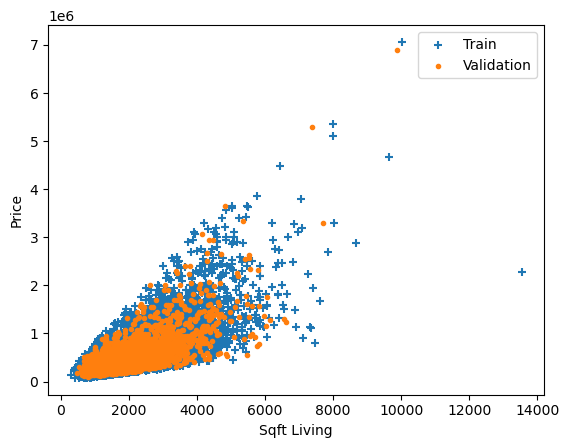

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

# Plot sqft_living vs housing price for the train and val dataset
plt.scatter(train_data['sqft_living'], train_data['price'], marker='+', label='Train')
plt.scatter(val_data['sqft_living'], val_data['price'], marker='.', label='Validation')

# Code to customize the axis labels
plt.legend()
plt.xlabel('Sqft Living')
plt.ylabel('Price')

For this problem, we will look at using two sets of features derived from the data inputs. The basic set of features only contains a few data inputs, while the advanced features contain the basic features and more.

In [14]:
basic_features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'zipcode']

In [15]:
# Note that advanced_features contains basic_features and more.
advanced_features = basic_features + [
    'condition',      # condition of the house
    'grade',          # measure of qality of construction
    'waterfront',     # waterfront property 
    'view',           # type of view
    'sqft_above',     # square feet above ground
    'sqft_basement',  # square feet in basementab
    'yr_built',       # the year built
    'yr_renovated',   # the year renovated
    'lat',            # the longitude of the parcel
    'long',           # the latitide of the parcel
    'sqft_living15',  # average sq.ft. of 15 nearest neighbors 
    'sqft_lot15',     # average lot size of 15 nearest neighbors 
]

---
In the following cell, you should train two linear regression models
* The first should be saved in a variable called `basic_model` that only uses the basic features
* The second should be saved in a variable called `advanced_model` that uses the advanced features

You'll need to look through the [LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) class from scikit-learn to look into how to train a regression model for this task. In particular, make sure you check out the `fit` function.

Notice that our goal is to eventually make a prediction of how the model will do in the future. You should keep this in mind when deciding which datasets (e.g., train, val) to use where.

In [16]:
### edTest(test_train_models) ###
from sklearn.linear_model import LinearRegression

# TODO
basic_model = LinearRegression().fit(train_data[basic_features], train_data['price'])

advanced_model = LinearRegression().fit(train_data[advanced_features], train_data['price'])


Now, we will evaluate the models' predictions to see how they perform.

---
# Root Mean Square Error (RMSE) of trained predictors

## Q5) What is the Root Mean Squared Errors (RMSE) on the training data using the basic model and the advanced model?


Use the models you trained in last question to predict what it thinks the values for the data points should be. You can look at the documentation from the [LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) class to see how to make predictions. 

The RMSE is another commonly reported metric used for regression models. The RMSE is similar to MSE but is modified slightly to scale the number down. The RMSE is defined as $$RMSE = \sqrt{MSE}$$

where the thing inside the square root is the Mean Square Error (MSE) we discussed in class. 

There are two ways you can calculate RMSE:
1. Use the `mean_squared_error` function from sklearn (documentation [here](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html#sklearn.metrics.mean_squared_error))

2. Use `numpy`'s element-wise operations (such as `-`, `**` - for exponent) and `np.mean` for calcuating the average

Note: It's more straightforward to use `sklearn`'s predefined functions, but using `numpy` will help you understand what is going on below-the-surface, which will help in future assignments.

**Save your result in variables named `train_rmse_basic` and `train_rmse_advanced` respectively.**

**Remember, we want you to report the square root of the MSE numbers**.

In [23]:
### edTest(test_train_rmse) ###
from sklearn.metrics import mean_squared_error

# TODO
train_rmse_basic = mean_squared_error(train_data['price'], basic_model.predict(train_data[basic_features])) ** 0.5
train_rmse_advanced = mean_squared_error(train_data['price'], advanced_model.predict(train_data[advanced_features])) ** 0.5

---
## Q6) What is the RMSE on the validation data using the basic model and the advanced model?

Similar to the last problem, but compute the val RMSE. Store your results in `val_rmse_basic` and `val_rmse_advanced`.

In [24]:
### edTest(test_val_rmse) ###

# TODO
val_rmse_basic = mean_squared_error(val_data['price'], basic_model.predict(val_data[basic_features])) ** 0.5
val_rmse_advanced = mean_squared_error(val_data['price'], advanced_model.predict(val_data[advanced_features])) ** 0.5

---
## Q7) What is the test error for the better model?

Using your validation errors, determine which model is better. For the better model, compute its test error, and store it in a variable `test_rmse`.

In [27]:
### edTest(test_test_rmse) ###

# TODO
if val_rmse_basic < val_rmse_advanced:
    test_rmse = mean_squared_error(test_data['price'], basic_model.predict(test_data[basic_features])) ** 0.5
else:
    test_rmse = mean_squared_error(test_data['price'], advanced_model.predict(test_data[advanced_features])) ** 0.5


> Copyright ©2023 Emily Fox and Hunter Schafer.  All rights reserved.  Permission is hereby granted to students registered for University of Washington CSE/STAT 416 for use solely during Spring Quarter 2024 for purposes of the course.  No other use, copying, distribution, or modification is permitted without prior written consent. Copyrights for third-party components of this work must be honored.  Instructors interested in reusing these course materials should contact the author.